<a href="https://colab.research.google.com/github/marclamberts/football-analysis/blob/main/Predictions_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Updated Match Outcome Probabilities (with Recent Form):
Real Madrid: 56.6%
Arsenal: 33.4%
Draw: 10.0%


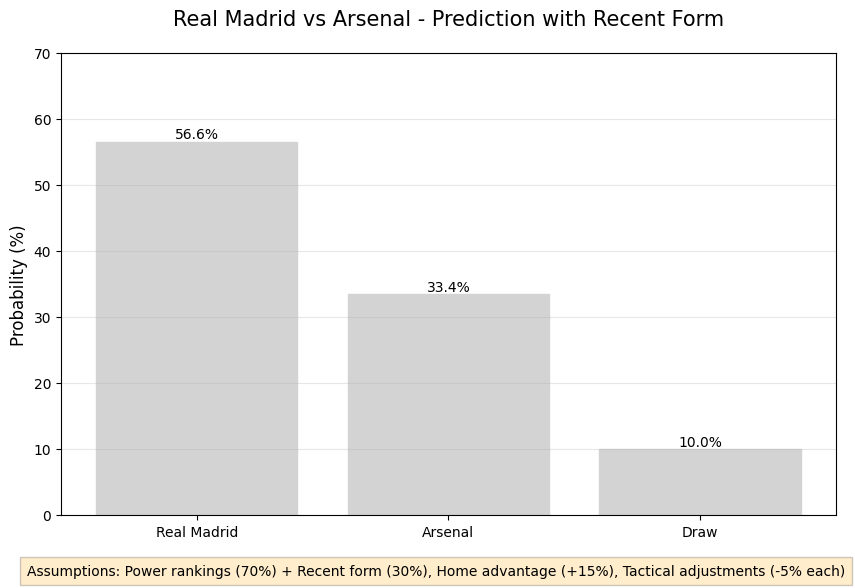

In [5]:
# Football Match Prediction Calculator - Updated with Recent Form
# Arsenal vs Real Madrid (2nd Leg - Match Result Only)

import matplotlib.pyplot as plt

def calculate_probabilities():
    # Input data
    arsenal_power = 99.0
    real_power = 96.6
    home_advantage = 15  # percentage boost for home team
    tactical_adjustment = 5  # reduction for attacking team
    draw_adjustment = 10  # increased chance of draw

    # Recent form (last 5 matches)
    arsenal_wins = 3  # 3 wins in last 5
    real_wins = 2     # 2 wins in last 5

    # Calculate form percentages
    arsenal_form = (arsenal_wins / 5) * 100  # 60%
    real_form = (real_wins / 5) * 100        # 40%

    # Calculate base probabilities from power rankings
    total_power = arsenal_power + real_power
    arsenal_base = (arsenal_power / total_power) * 100
    real_base = (real_power / total_power) * 100

    # Combine power rankings (70%) and recent form (30%)
    arsenal_combined = (arsenal_base * 0.7) + (arsenal_form * 0.3)
    real_combined = (real_base * 0.7) + (real_form * 0.3)

    # Apply adjustments
    real_with_home = real_combined + home_advantage
    arsenal_with_home = arsenal_combined - home_advantage

    real_final = real_with_home - tactical_adjustment
    arsenal_final = arsenal_with_home - tactical_adjustment
    draw_prob = draw_adjustment

    # Normalize to 100%
    total = real_final + arsenal_final + draw_prob
    real_final = (real_final / total) * 100
    arsenal_final = (arsenal_final / total) * 100
    draw_prob = (draw_prob / total) * 100

    return {
        "Real Madrid": real_final,
        "Arsenal": arsenal_final,
        "Draw": draw_prob
    }

# Calculate probabilities
probabilities = calculate_probabilities()

# Display results
print("Updated Match Outcome Probabilities (with Recent Form):")
for team, prob in probabilities.items():
    print(f"{team}: {prob:.1f}%")

# Visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(probabilities.keys(), probabilities.values(),
               color=['white', 'red', 'gray'])

# Style the bars
for bar in bars:
    if bar.get_label() == 'Real Madrid':
        bar.set_color('white')
        bar.set_edgecolor('purple')
        bar.set_linewidth(2)
    elif bar.get_label() == 'Arsenal':
        bar.set_color('red')
        bar.set_edgecolor('white')
        bar.set_linewidth(2)
    else:
        bar.set_color('lightgray')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.title('Real Madrid vs Arsenal - Prediction with Recent Form', fontsize=15, pad=20)
plt.ylabel('Probability (%)', fontsize=12)
plt.ylim(0, 70)
plt.grid(axis='y', alpha=0.3)

# Add footnote with assumptions
plt.figtext(0.5, 0.01,
            "Assumptions: Power rankings (70%) + Recent form (30%), Home advantage (+15%), Tactical adjustments (-5% each)",
            ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

plt.show()